In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\Admin\Airbnb+Data\power bi projects\Housing.csv")

In [61]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [63]:
df.shape

(545, 13)

In [64]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [65]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


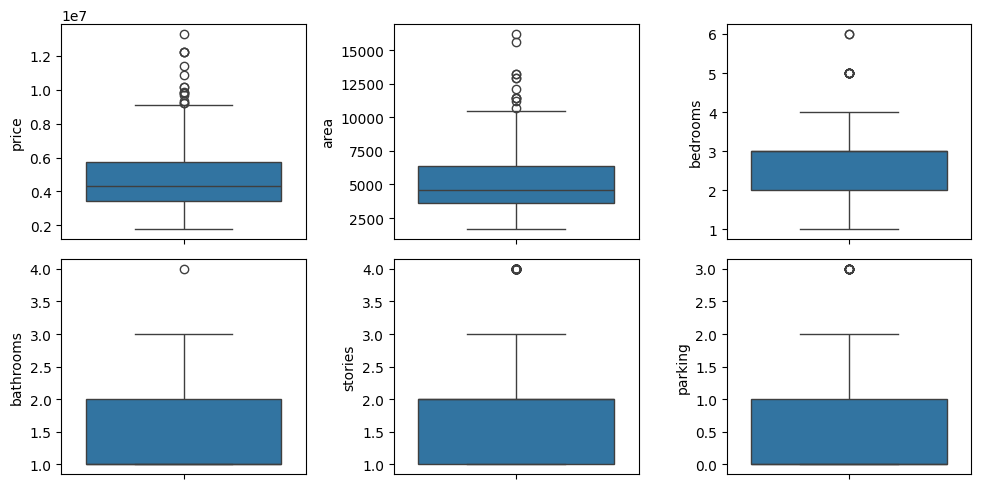

In [66]:

fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()


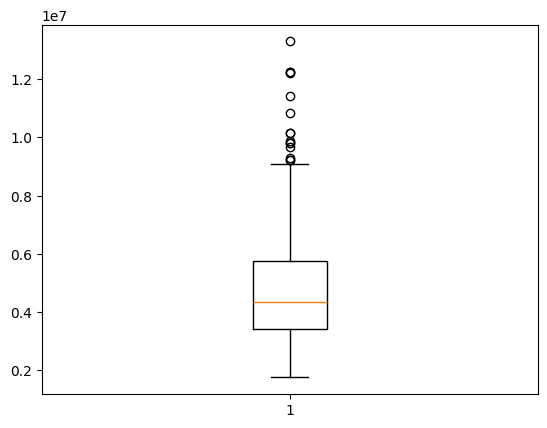

In [67]:
plt.boxplot(df.price)
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

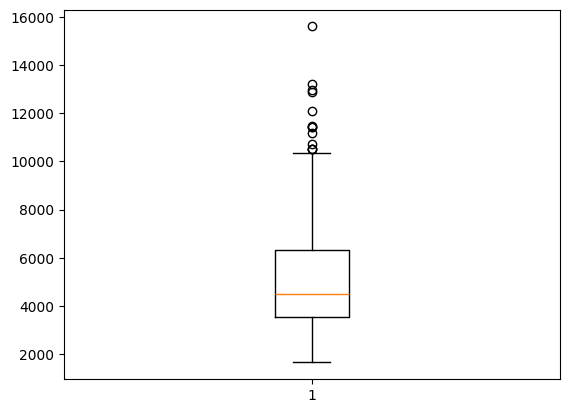

In [68]:
plt.boxplot(df["area"])
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]

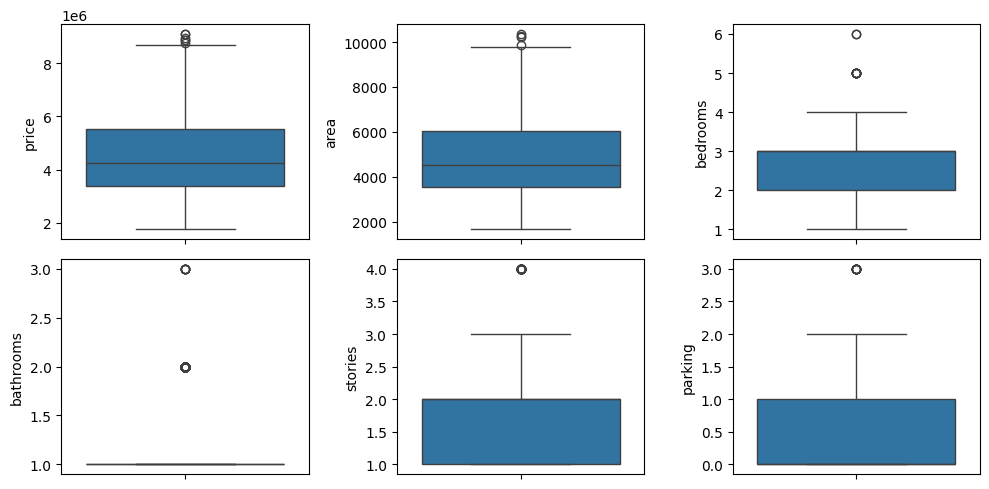

In [69]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

In [70]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [71]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [72]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517 entries, 15 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             517 non-null    int64 
 1   area              517 non-null    int64 
 2   bedrooms          517 non-null    int64 
 3   bathrooms         517 non-null    int64 
 4   stories           517 non-null    int64 
 5   mainroad          517 non-null    int64 
 6   guestroom         517 non-null    int64 
 7   basement          517 non-null    int64 
 8   hotwaterheating   517 non-null    int64 
 9   airconditioning   517 non-null    int64 
 10  parking           517 non-null    int64 
 11  prefarea          517 non-null    int64 
 12  furnishingstatus  517 non-null    object
dtypes: int64(12), object(1)
memory usage: 56.5+ KB


# The variable furnishingstatus has three levels. We need to convert these levels into integer as well.

# For this, we will use something called dummy variables

In [81]:
status = pd.get_dummies(df['furnishingstatus'])

In [82]:
status.head()

,furnished,semi-furnished,unfurnished
0,False,True,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,True,False


In [83]:
df = df.reset_index(drop = True)

In [84]:
status  = status.astype(int)

In [85]:
status.shape

(517, 3)

In [86]:
status

,furnished,semi-furnished,unfurnished
0,0,1,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
512,0,0,1
513,0,1,0
514,0,0,1
515,1,0,0


In [89]:
status = pd.get_dummies(df['furnishingstatus'], drop_first = True)

In [91]:
df = pd.concat([df,status],axis = 1)

In [92]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,True,False
1,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,False,True
2,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,False,False
3,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,False,False
4,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,True,False


In [96]:
df["semi-furnished"] = df["semi-furnished"].astype(int)
df["unfurnished"] = df["unfurnished"].astype(int)

In [97]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
1,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
2,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
3,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
4,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0


In [98]:
df.drop(["furnishingstatus"],axis = 1,inplace = True)

In [100]:
df.shape

(517, 14)

In [102]:
from sklearn.model_selection import train_test_split
#intializing training and testing data
np.random.seed(0)
df_train,df_test = train_test_split(df,train_size = 0.7,test_size = 0.3,random_state = 100)

# Feature scaling

In [104]:
# we need to scale our data for better model evaluation we use min-max scaling

In [105]:
from sklearn.preprocessing import MinMaxScaler

In [111]:
scaler = MinMaxScaler()

In [112]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [114]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
124,0.523810,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,1,0
209,0.390476,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
329,0.275238,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,0,0
397,0.219048,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,0,0
488,0.095238,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,0,0,1


In [115]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.383701,0.350081,0.390582,0.127424,0.268698,0.875346,0.168975,0.349030,0.038781,0.313019,0.218837,0.207756,0.476454,0.304709
std,0.209712,0.207184,0.149146,0.224465,0.287833,0.330784,0.375250,0.477325,0.193341,0.464366,0.287286,0.406264,0.500138,0.460923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.237143,0.189829,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.338095,0.295092,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.514286,0.491425,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


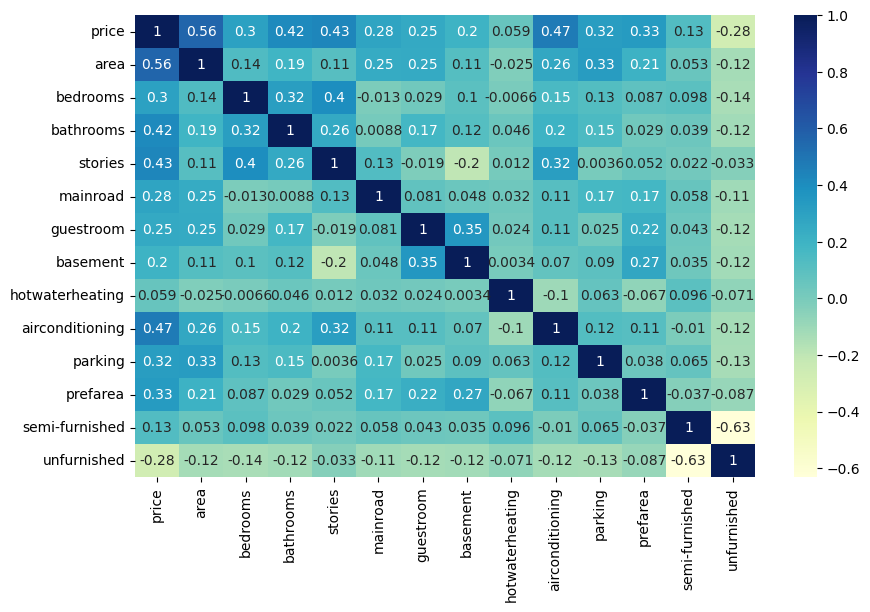

In [116]:
plt.figure(figsize = (10,6))
sns.heatmap(df_train.corr(),annot = True,cmap = "YlGnBu")
plt.show()

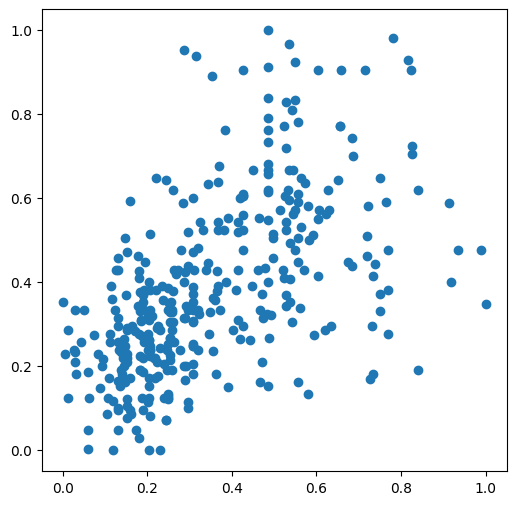

In [118]:
# AS you might see there is a strong correlation between price and area.let's check them
plt.figure(figsize= (6,6))
plt.scatter(df_train.area,df_train.price)
plt.show()

In [119]:
# So, we pick area as the first variable and we'll try to fit a regression line to that.
y = df_train.pop('price')
x = df_train

In [120]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [123]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 670.4 kB/s eta 0:00:14
   --- ------------------------------------ 0.8/9.8 MB 780.2 kB/s eta 0:00:12
   --- ------------------------------------ 0.8/9.8 MB 780.2 kB/s eta 0:00:12
   ---- ----------------------------------- 1.0/9.8 MB 811.6 kB/s eta 0:00:11
   ----- ---------------------------------- 1.3/9.8 MB 907.1 kB/s eta 0:00:10
   ------ --------------------------------- 1.6/9.8 MB 953.2 kB/s eta 0:00:09
   ------ --------------------------------- 1.6/9.8 MB 953.2 kB/s eta 0:00:09
   ------ --------------------------------- 1.6/9.8 MB 953.2 kB/s eta 0:00:09
   ------- -------------------------------- 1.8/9.8 MB 798.8 kB/s eta 0:00:11
   --------- ---------

In [129]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(x)

lr_1 = sm.OLS(y, X_train_lm).fit()

lr_1.params

const              0.085121
area               0.324230
bedrooms          -0.004788
bathrooms          0.175939
stories            0.205373
mainroad           0.045567
guestroom          0.014071
basement           0.043549
hotwaterheating    0.073525
airconditioning    0.091088
parking            0.081103
prefarea           0.088018
semi-furnished     0.002938
unfurnished       -0.055529
dtype: float64

In [130]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     49.95
Date:                Mon, 13 Jan 2025   Prob (F-statistic):           2.56e-71
Time:                        15:11:08   Log-Likelihood:                 242.54
No. Observations:                 361   AIC:                            -457.1
Df Residuals:                     347   BIC:                            -402.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0851      0.031     

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [134]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,7.40
4,mainroad,6.31
0,area,5.01
11,semi-furnished,2.79
3,stories,2.78
6,basement,2.03
12,unfurnished,1.98
9,parking,1.87
8,airconditioning,1.81
2,bathrooms,1.63


In [138]:
X = x.drop('semi-furnished',axis = 1)

In [140]:
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y, X_train_lm).fit()

In [141]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     54.26
Date:                Mon, 13 Jan 2025   Prob (F-statistic):           3.45e-72
Time:                        15:17:22   Log-Likelihood:                 242.52
No. Observations:                 361   AIC:                            -459.0
Df Residuals:                     348   BIC:                            -408.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0871      0.028     

In [142]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,6.61
4,mainroad,5.80
0,area,4.97
3,stories,2.77
6,basement,2.03
9,parking,1.87
8,airconditioning,1.80
2,bathrooms,1.62
5,guestroom,1.51
10,prefarea,1.47


In [143]:
X = X.drop('bedrooms',axis = 1)

In [145]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y, X_train_lm).fit()

In [146]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     59.36
Date:                Mon, 13 Jan 2025   Prob (F-statistic):           4.38e-73
Time:                        15:19:21   Log-Likelihood:                 242.52
No. Observations:                 361   AIC:                            -461.0
Df Residuals:                     349   BIC:                            -414.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0856      0.022     

In [147]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mainroad,4.82
0,area,4.73
2,stories,2.34
5,basement,1.89
8,parking,1.86
7,airconditioning,1.80
1,bathrooms,1.56
4,guestroom,1.50
9,prefarea,1.47
10,unfurnished,1.35


In [148]:
X = X.drop('basement',axis = 1)

In [149]:
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y, X_train_lm).fit()

In [150]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     63.37
Date:                Mon, 13 Jan 2025   Prob (F-statistic):           2.09e-72
Time:                        15:21:49   Log-Likelihood:                 238.68
No. Observations:                 361   AIC:                            -455.4
Df Residuals:                     350   BIC:                            -412.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0992      0.022     

In [152]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,area,4.73
3,mainroad,4.59
2,stories,2.22
7,parking,1.86
6,airconditioning,1.78
1,bathrooms,1.53
8,prefarea,1.40
4,guestroom,1.39
9,unfurnished,1.35
5,hotwaterheating,1.07


In [153]:
y_train_price = lr_4.predict(X_train_lm)

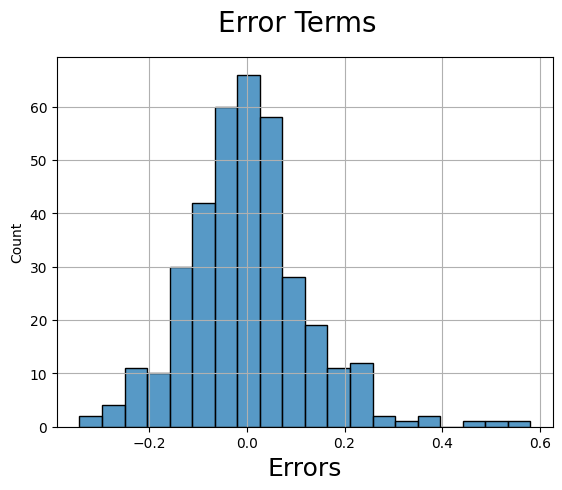

In [157]:
fig = plt.figure()
plt.grid()
sns.histplot((y - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

In [158]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [160]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.383101,0.359949,0.383333,0.137821,0.256410,0.794872,0.198718,0.339744,0.051282,0.294872,0.215812,0.237179,0.275641,0.416667
std,0.233648,0.218277,0.139969,0.251279,0.290460,0.405096,0.400320,0.475147,0.221283,0.457454,0.267216,0.426723,0.448276,0.494594
min,0.009524,-0.030160,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.209524,0.200473,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.340476,0.340035,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.516667,0.489355,0.400000,0.125000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,0.985807,0.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [161]:
y_test = df_test.pop('price')
X_test = df_test

In [162]:
X_test_m4 = sm.add_constant(X_test)

In [163]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["bedrooms", "semi-furnished", "basement"], axis = 1)

In [164]:
# Making predictions using the fourth model

y_pred_m4 = lr_4.predict(X_test_m4)

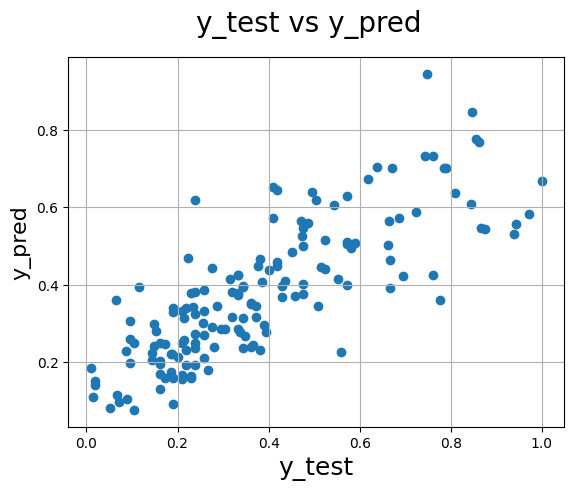

In [165]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.grid()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   
plt.show()

In [166]:
from sklearn.metrics import r2_score

In [167]:
r2_score_lr_train=0.676
print("R-squared Train:",r2_score_lr_train)

R-squared Train: 0.676


In [168]:
r2_score_lr_test=round(r2_score(y_test, y_pred_m4),3)
print("R-squared Test:",r2_score_lr_test)

R-squared Test: 0.646


In [169]:
lr_4.params.sort_values(ascending = False) 

area               0.320914
stories            0.186356
bathrooms          0.184727
const              0.099234
prefarea           0.098345
airconditioning    0.094088
parking            0.084717
hotwaterheating    0.074854
mainroad           0.046167
guestroom          0.029314
unfurnished       -0.059670
dtype: float64

In [ ]:
#The features which affects the Housing Price Prediction:

#area
#bathrooms
#stories
#hotwaterheating
#airconditioning